In [2]:
import os
import numpy as np
import pandas as pd

%matplotlib inline
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, balanced_accuracy_score
from pandas.plotting import scatter_matrix
plt.style.use("dark_background")

import pickle

#### __1. Load the data__

In [3]:
train_data = pd.read_csv(os.path.expanduser("~/Desktop/Projects/api/data/iris.csv"))
train_data

Id  SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm  \
0      1            5.1           3.5            1.4           0.2   
1      2            4.9           3.0            1.4           0.2   
2      3            4.7           3.2            1.3           0.2   
3      4            4.6           3.1            1.5           0.2   
4      5            5.0           3.6            1.4           0.2   
..   ...            ...           ...            ...           ...   
145  146            6.7           3.0            5.2           2.3   
146  147            6.3           2.5            5.0           1.9   
147  148            6.5           3.0            5.2           2.0   
148  149            6.2           3.4            5.4           2.3   
149  150            5.9           3.0            5.1           1.8   

            Species  
0       Iris-setosa  
1       Iris-setosa  
2       Iris-setosa  
3       Iris-setosa  
4       Iris-setosa  
..              ...  
145  Iris-virginica  
146  Iris-virginica  
147  Iris-virginica  
148  Iris-virginica  
149  Iris-virginica  

[150 rows x 6 columns]

In [5]:
if train_data['Species'].dtypes == np.object:
    print("yes")

yes


In [5]:
train_data.describe()
# no missing values

Id  SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm
count  150.000000     150.000000    150.000000     150.000000    150.000000
mean    75.500000       5.843333      3.054000       3.758667      1.198667
std     43.445368       0.828066      0.433594       1.764420      0.763161
min      1.000000       4.300000      2.000000       1.000000      0.100000
25%     38.250000       5.100000      2.800000       1.600000      0.300000
50%     75.500000       5.800000      3.000000       4.350000      1.300000
75%    112.750000       6.400000      3.300000       5.100000      1.800000
max    150.000000       7.900000      4.400000       6.900000      2.500000

In [5]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
Id               150 non-null int64
SepalLengthCm    150 non-null float64
SepalWidthCm     150 non-null float64
PetalLengthCm    150 non-null float64
PetalWidthCm     150 non-null float64
Species          150 non-null object
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


#### __2. Plot the data__

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x1a266bf7d0>,
      dtype=object)

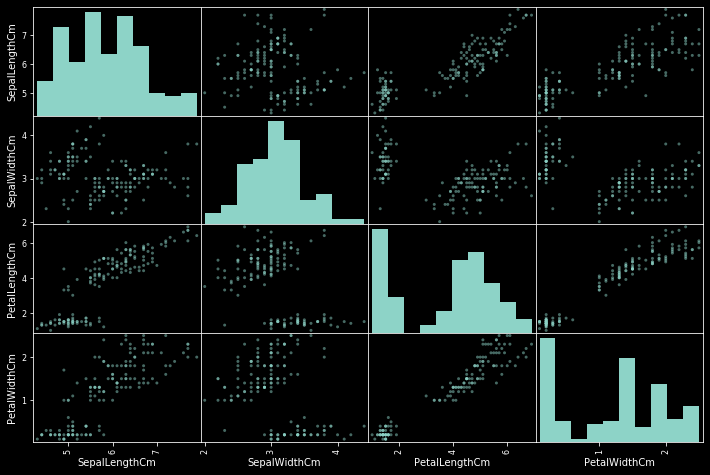

In [6]:
attributes = ["SepalLengthCm", "SepalWidthCm", "PetalLengthCm", "PetalWidthCm"]
scatter_matrix(train_data[attributes], figsize = (12, 8))

#### __3. Selecting features and target__

In [7]:
iris_features = ["SepalLengthCm", "SepalWidthCm", "PetalLengthCm", "PetalWidthCm"]
X = train_data[iris_features]

In [8]:
X.describe()

SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm
count     150.000000    150.000000     150.000000    150.000000
mean        5.843333      3.054000       3.758667      1.198667
std         0.828066      0.433594       1.764420      0.763161
min         4.300000      2.000000       1.000000      0.100000
25%         5.100000      2.800000       1.600000      0.300000
50%         5.800000      3.000000       4.350000      1.300000
75%         6.400000      3.300000       5.100000      1.800000
max         7.900000      4.400000       6.900000      2.500000

In [9]:
# target value is categorial -> use classifier not regression
y = train_data.Species
y.unique()

array(['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'], dtype=object)

#### __4. Split data into train and validation Set__

In [10]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 42)

In [11]:
X.shape

(150, 4)

In [12]:
y.shape

(150,)

#### __5. Build the model__

- RandomForestClassifier, classifier because the target value is categorical
- One of the most accurate learning algorithms

#### __5.1 RF Background__

- RF is an estimator that fits a number of decision tree classifiers sub-samples of the dataset and uses averaging to improve the predictive accuracy and control overfitting
- When splitting each node during the construction of a tree, the best split is found either from (1) all input features or (2) a random subset of size `max_features`
<br>
<br>
- Purpose of these two sources of randomness is to decrease the variance of the forest estimator
- Individual decision trees typically exhibit high variance and tend to overfit
- RFs achieve reduced variance by combining diverse trees -> variance reduction is often significant, thus yielding an overall better model
<br>
<br>
- __Voting:__ Every model makes a prediction (votes) for each test instance and the final output prediction is the one that receives more than half of the votes
- Scikit-learn implementation combines classifiers by _averaging_ their probalistic prediction instead of letting each classifier vote for a single class

#### __5.2 RF Parameters__

- Main parameters to adjust are `n_estimators` and `max_features`
- Empirical good default values are:
    - `max_features = None` (always considering all features instead of a random subset) for regression problems 
    - `max_features = "sqrt"`(using a random subset of size `sqrt(n_features)`) for classification tasks (where `n\_features` is the number of features in the data)
- Good results are often achieved when setting `max_depth = None` in combination with `min_samples_split = 2` (i.e., when fully developing the trees) which are the default values
- Best parameter values should always be __cross-validated__
<br>
<br>
- `n_estimators:` number of trees in the forest, the larger the better but the longer it takes to compute
- Results will stop getting significantly better beyond a critical number of trees
<br>
<br>
- `max_features:` size of random subsets of features to consider when splitting a node
- The lower the size the greater the reduction of variance but also the greater the increase in bias
<br>
<br>
- High-variance learning models may be able to represent their training set well but are at risk of overfitting to noisy or unrepresentative data
- High-bias algorithms typically produce simpler models that don't tend to overfit but may underfit their training data, failing to capture important regularities

In [13]:
clf = RandomForestClassifier(n_estimators = 100, max_depth = None) 
clf.fit(X_train, y_train)
# no cross-validation used

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [14]:
y_predict = clf.predict(X_test)

#### __6. Quantifying the quality of prediction__

In [15]:
print("Accuracy Score: ", accuracy_score(y_test, y_predict))

Accuracy Score:  1.0


In [16]:
clf.predict([[3, 5, 4, 2]])

array(['Iris-virginica'], dtype=object)

#### __7. Save model on disk__

In [17]:
with open("model/clf.pkl", "wb") as file:
    pickle.dump(clf, file)

In [18]:
model_columns = list(X.columns)
with open("model/model_columns.pkl", "wb") as file:
    pickle.dump(model_columns, file)

In [19]:
model_columns

['SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm']

In [20]:
X_test

SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm
73             6.1           2.8            4.7           1.2
18             5.7           3.8            1.7           0.3
118            7.7           2.6            6.9           2.3
78             6.0           2.9            4.5           1.5
76             6.8           2.8            4.8           1.4
31             5.4           3.4            1.5           0.4
64             5.6           2.9            3.6           1.3
141            6.9           3.1            5.1           2.3
68             6.2           2.2            4.5           1.5
82             5.8           2.7            3.9           1.2
110            6.5           3.2            5.1           2.0
12             4.8           3.0            1.4           0.1
36             5.5           3.5            1.3           0.2
9              4.9           3.1            1.5           0.1
19             5.1           3.8            1.5           0.3
56             6.3           3.3            4.7           1.6
104            6.5           3.0            5.8           2.2
69             5.6           2.5            3.9           1.1
55             5.7           2.8            4.5           1.3
132            6.4           2.8            5.6           2.2
29             4.7           3.2            1.6           0.2
127            6.1           3.0            4.9           1.8
26             5.0           3.4            1.6           0.4
128            6.4           2.8            5.6           2.1
131            7.9           3.8            6.4           2.0
145            6.7           3.0            5.2           2.3
108            6.7           2.5            5.8           1.8
143            6.8           3.2            5.9           2.3
45             4.8           3.0            1.4           0.3
30             4.8           3.1            1.6           0.2
22             4.6           3.6            1.0           0.2
15             5.7           4.4            1.5           0.4
65             6.7           3.1            4.4           1.4
11             4.8           3.4            1.6           0.2
42             4.4           3.2            1.3           0.2
146            6.3           2.5            5.0           1.9
51             6.4           3.2            4.5           1.5
27             5.2           3.5            1.5           0.2